In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score, roc_auc_score, roc_curve, accuracy_score,precision_score,f1_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from statsmodels.discrete.discrete_model import Logit
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
%matplotlib inline

In [2]:
#http://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data#
data = pd.read_csv("Financial Distress_new.csv")
data.columns

Index(['ROA', 'Debt ratio', 'working capital/TA', 'Current ratio',
       'Bankruptcy ratio', 'retained earnings/total assets', ' EBIT/TA',
       'Attr8', ' Sales/TA', 'Attr10', 'Attr11',
       'Gross profit/st liabilities ', '(gross profit + DA)/sales ', 'Attr14',
       '(TA* 365) / (GP+ DA) ', 'Attr16', 'Attr17', 'Attr18', 'Attr19',
       'Attr20', 'Attr21', 'Attr22', 'Attr23', 'Attr24', 'Attr25', 'Attr26',
       'POA/ FE', 'working capital/fixed assets ', 'logarithm of TA', 'Attr30',
       'Attr31', '(current L * 365) / CPS', 'Attr33', 'Attr34', 'Attr35',
       ' total sales / TA', 'Attr37', 'Attr38', 'Attr39', 'Attr40',
       'TL / ((POA +DA) * (12/365))', 'Attr42', 'Attr43', 'Attr44',
       ' net profit / inventory', 'Attr46', 'Attr47', 'Attr48', 'Attr49',
       'Attr50', 'Attr51', 'Attr52', 'Attr53', 'Attr54', 'working capital',
       'Attr56', '(CA-I-st liabilities)/(sales-GP-DA) ', 'Attr58',
       ' lt liabilities/equity ', 'Attr60', ' sales/receivables', 'Attr62',


In [3]:
data.head()

,ROA,Debt ratio,working capital/TA,Current ratio,Bankruptcy ratio,retained earnings/total assets,EBIT/TA,Attr8,Sales/TA,Attr10,...,Attr56,(CA-I-st liabilities)/(sales-GP-DA),Attr58,lt liabilities/equity,Attr60,sales/receivables,Attr62,Attr63,sales/fixed assets,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


In [4]:
data.isnull().sum()

ROA                                        3
Debt ratio                                 3
working capital/TA                         3
Current ratio                             30
Bankruptcy ratio                           8
retained earnings/total assets             3
 EBIT/TA                                   3
Attr8                                     25
 Sales/TA                                  1
Attr10                                     3
Attr11                                    39
Gross profit/st liabilities               30
(gross profit + DA)/sales                  0
Attr14                                     3
(TA* 365) / (GP+ DA)                       2
Attr16                                    25
Attr17                                    25
Attr18                                     3
Attr19                                     0
Attr20                                     0
Attr21                                  1622
Attr22                                     3
Attr23    

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 65 columns):
ROA                                     7024 non-null float64
Debt ratio                              7024 non-null float64
working capital/TA                      7024 non-null float64
Current ratio                           6997 non-null float64
Bankruptcy ratio                        7019 non-null float64
retained earnings/total assets          7024 non-null float64
 EBIT/TA                                7024 non-null float64
Attr8                                   7002 non-null float64
 Sales/TA                               7026 non-null float64
Attr10                                  7024 non-null float64
Attr11                                  6988 non-null float64
Gross profit/st liabilities             6997 non-null float64
(gross profit + DA)/sales               7027 non-null float64
Attr14                                  7024 non-null float64
(TA* 365) / (GP+ DA)     

In [6]:
data.drop(["Attr37","Attr21"],axis=1,inplace=True)

In [7]:
data.dropna(inplace=True)

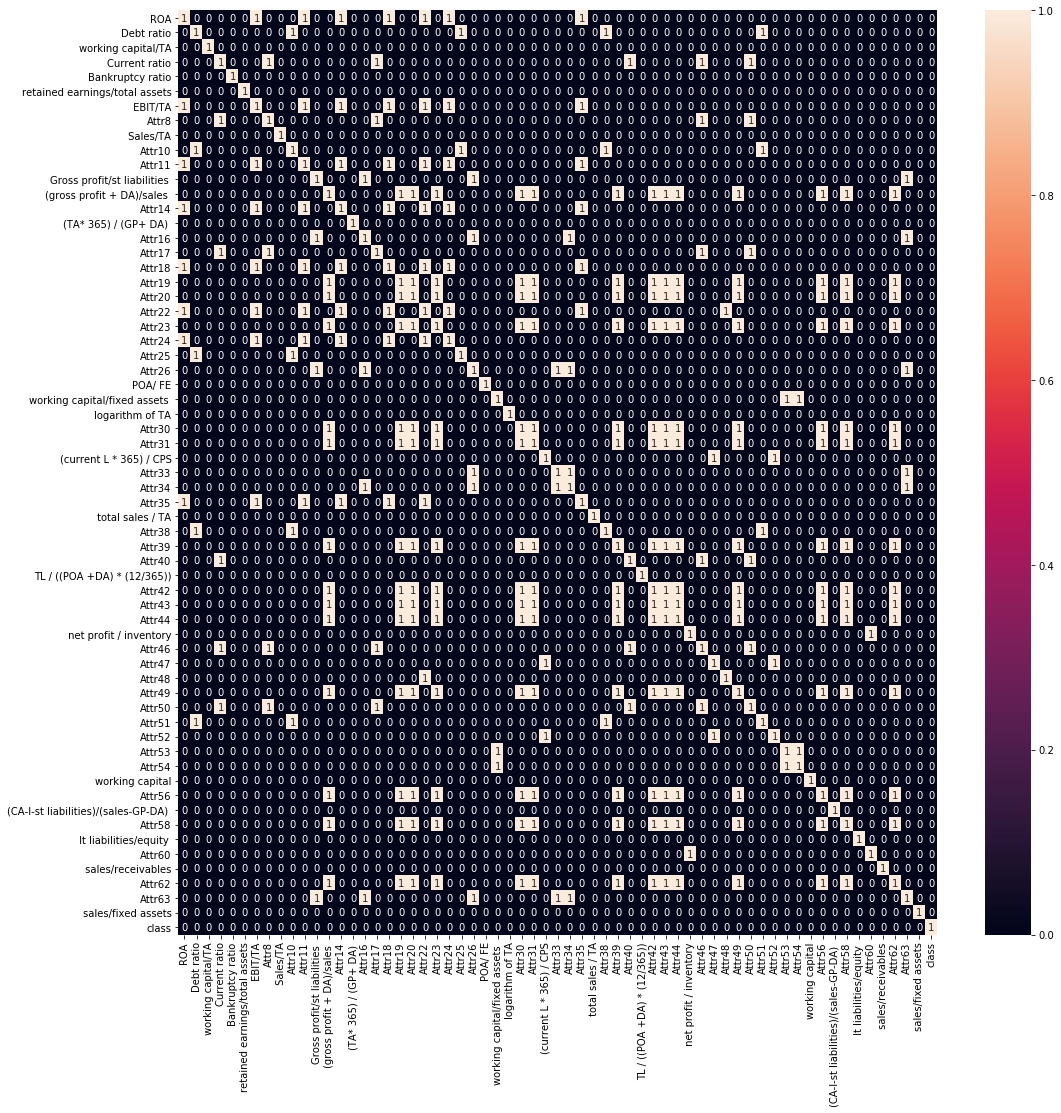

In [8]:
plt.figure(figsize=(17,17))
sns.heatmap(data.corr().abs().round(2)>0.75,annot=True)
plt.show()

In [9]:
#Dropping highly correlated variables
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

# Drop features 
data.drop(to_drop,axis=1,inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6318 entries, 0 to 7026
Data columns (total 23 columns):
ROA                                     6318 non-null float64
Debt ratio                              6318 non-null float64
working capital/TA                      6318 non-null float64
Current ratio                           6318 non-null float64
Bankruptcy ratio                        6318 non-null float64
retained earnings/total assets          6318 non-null float64
 Sales/TA                               6318 non-null float64
Gross profit/st liabilities             6318 non-null float64
(gross profit + DA)/sales               6318 non-null float64
(TA* 365) / (GP+ DA)                    6318 non-null float64
POA/ FE                                 6318 non-null float64
working capital/fixed assets            6318 non-null float64
logarithm of TA                         6318 non-null float64
(current L * 365) / CPS                 6318 non-null float64
 total sales / TA        

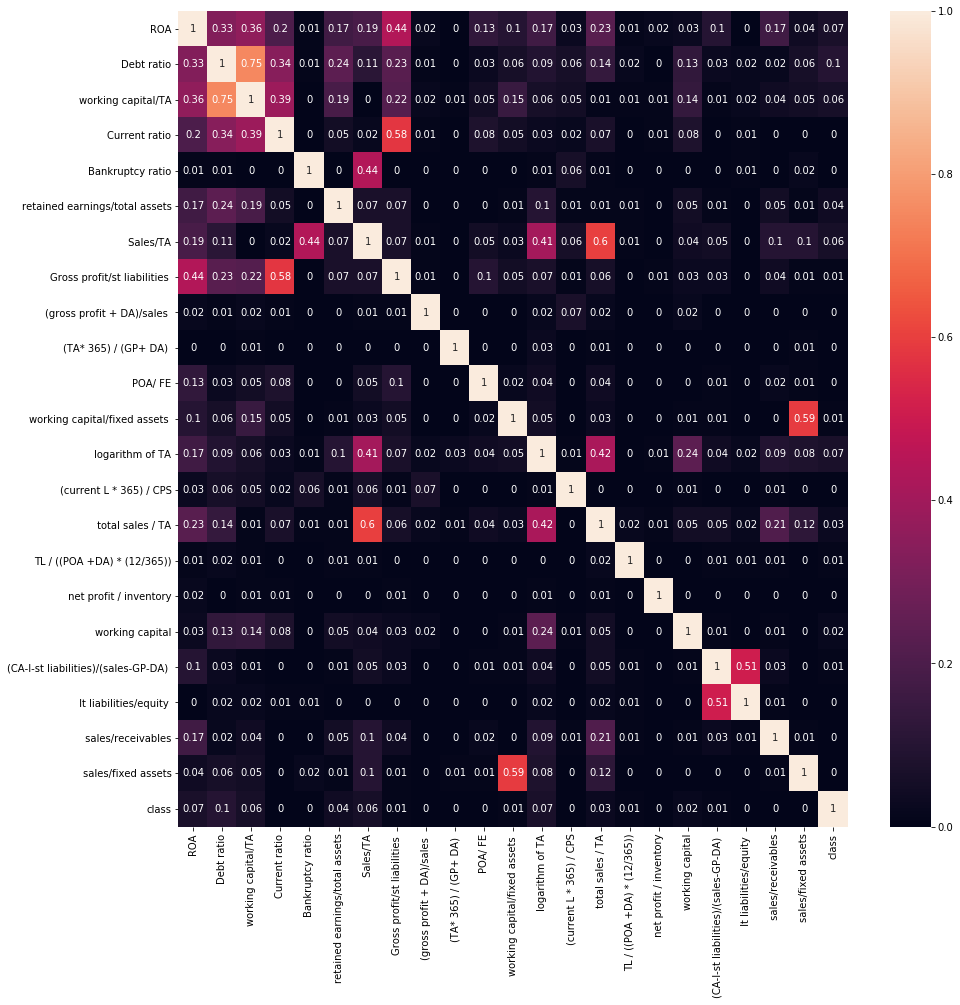

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr().abs().round(2),annot=True)
plt.show()

In [12]:
data.describe()

,ROA,Debt ratio,working capital/TA,Current ratio,Bankruptcy ratio,retained earnings/total assets,Sales/TA,Gross profit/st liabilities,(gross profit + DA)/sales,(TA* 365) / (GP+ DA),...,(current L * 365) / CPS,total sales / TA,TL / ((POA +DA) * (12/365)),net profit / inventory,working capital,(CA-I-st liabilities)/(sales-GP-DA),lt liabilities/equity,sales/receivables,sales/fixed assets,class
count,6318.000000,6318.000000,6318.000000,6318.000000,6318.000000,6318.000000,6318.000000,6318.000000,6318.000000,6.318000e+03,...,6318.000000,6318.000000,6318.000000,6318.000000,6.318000e+03,6318.000000,6318.000000,6318.000000,6318.000000,6318.000000
mean,0.104830,0.502763,0.186207,2.415774,259.724237,0.069094,1.737526,0.708730,0.003532,1.045231e+03,...,147.012696,2.099270,0.559722,-33.417756,9.501315e+03,0.261065,0.244608,11.281208,20.578546,0.016619
std,0.155845,0.310280,0.304604,4.148543,16900.579795,0.547169,1.517129,2.713246,7.655596,7.526631e+04,...,1718.507399,1.397195,13.869847,3226.346605,7.568994e+04,2.031459,6.345366,35.267407,161.522271,0.127850
min,-1.186200,0.004765,-10.036000,0.060713,-102660.000000,-37.292000,0.001423,-23.207000,-607.420000,-5.611900e+06,...,0.412800,0.002692,-77.791000,-256230.000000,-8.004700e+05,-19.425000,-327.970000,0.000408,0.000066,0.000000
25%,0.022538,0.298922,0.029755,1.066275,-44.025500,0.000000,1.036300,0.064774,0.039266,3.735275e+02,...,48.577250,1.261250,0.036817,0.109125,1.399825e+02,0.060208,0.000000,4.884625,2.502675,0.000000
50%,0.076168,0.481230,0.181190,1.503100,-5.987600,0.000000,1.180300,0.252100,0.081404,9.560200e+02,...,75.832000,1.795100,0.089900,0.415415,1.728300e+03,0.175580,0.034980,7.066550,4.532850,0.000000
75%,0.157772,0.677360,0.358245,2.449350,36.462500,0.163585,2.047500,0.679600,0.144440,2.165900e+03,...,117.962500,2.562625,0.201008,1.166075,6.388550e+03,0.346527,0.284968,10.647750,9.383500,0.000000
max,1.994300,10.759000,0.951800,163.890000,990900.000000,3.424400,71.555000,157.800000,12.330000,1.432000e+06,...,115980.000000,26.044000,813.140000,5986.800000,4.398400e+06,126.670000,119.580000,1451.500000,8226.600000,1.000000


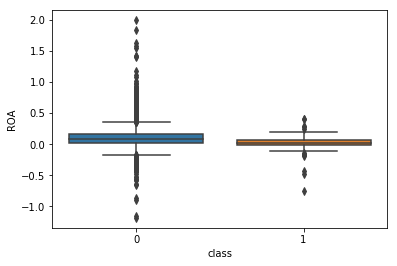

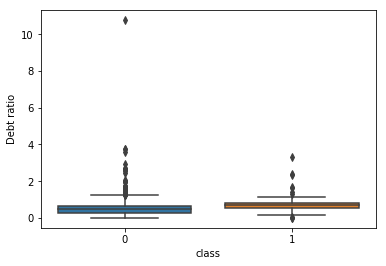

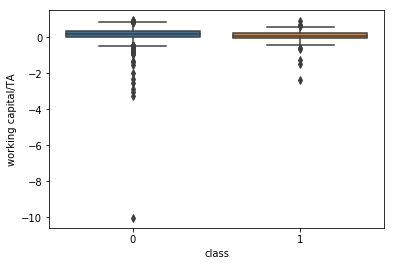

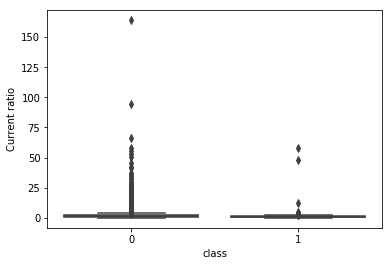

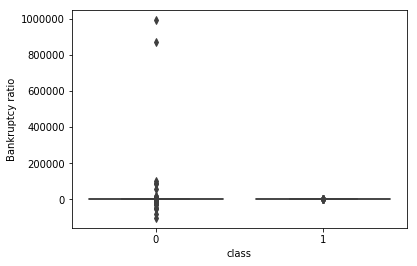

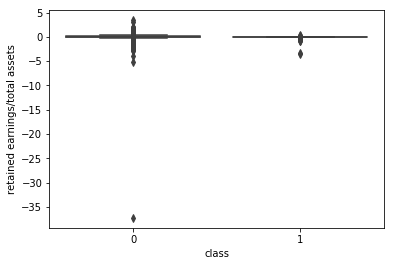

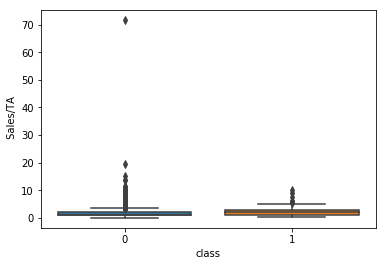

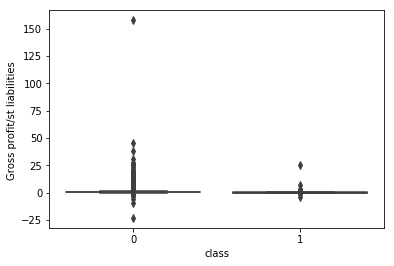

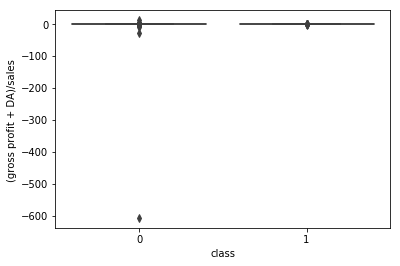

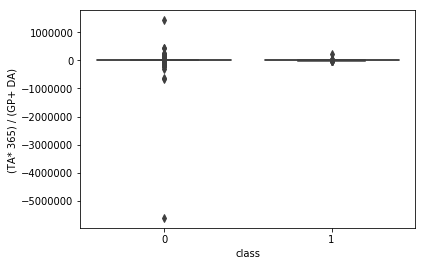

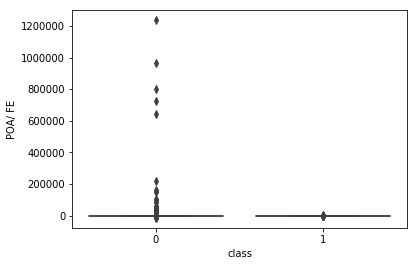

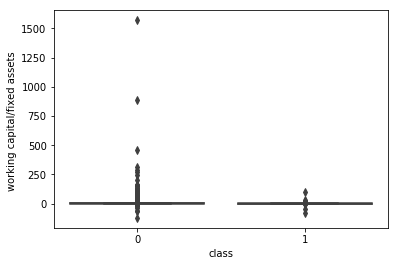

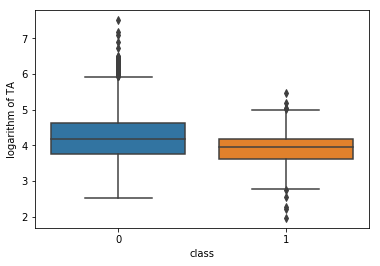

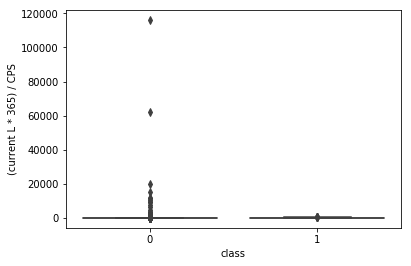

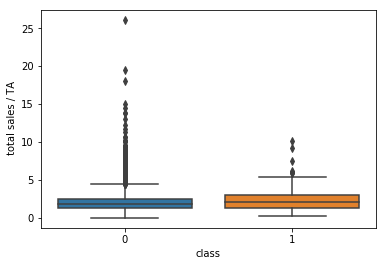

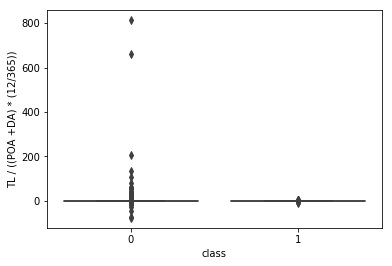

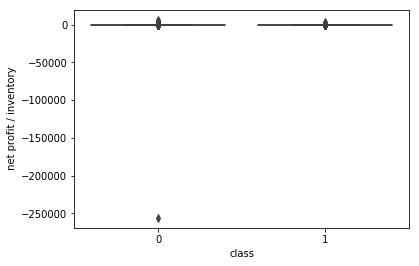

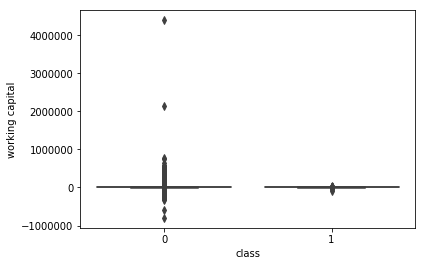

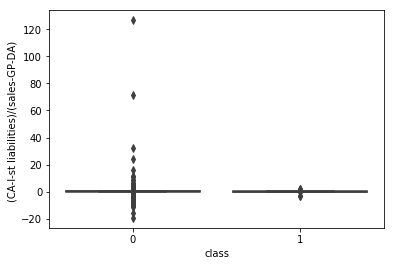

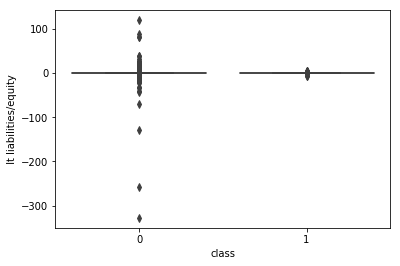

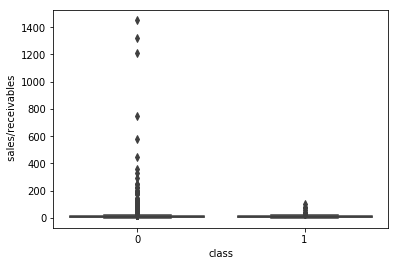

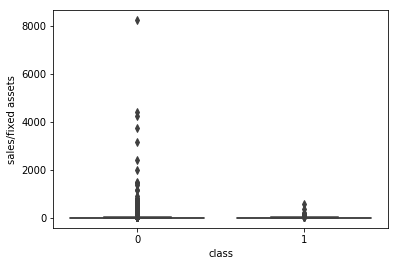

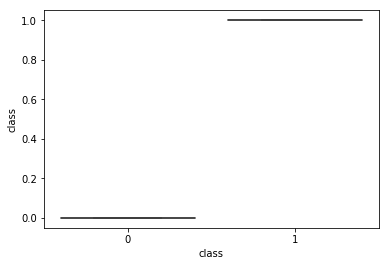

In [13]:
for i in data.columns:
    sns.boxplot(data['class'],data[i])
    plt.show()

In [14]:
#how many 0s and 1s in original data
np.round(data['class'].value_counts()/len(data)*100,0)

0    98.0
1     2.0
Name: class, dtype: float64

In [15]:
X=data.drop('class',axis=1)
Y=data["class"]

In [16]:
#scaling data
scaler=StandardScaler()
scaler.fit(X)
X_scaled=pd.DataFrame(scaler.transform(X),columns=X.columns,index=X.index)

In [17]:
#Splitting the data into training and testing set
X_train,X_test,y_train,y_test = train_test_split(X_scaled,Y, test_size = 0.3, random_state = 0)

In [18]:
grid_search1=GridSearchCV(LogisticRegression(class_weight='balanced'),
                          param_grid={"C":np.linspace(0.001,10,10)},scoring="recall",
                          cv=5,n_jobs=-1).fit(X_train,y_train)
grid_search2=GridSearchCV(DecisionTreeClassifier(class_weight='balanced'),
                          param_grid={"max_depth":range(2,15),"min_samples_leaf":range(10,200)},
                          cv=5,scoring="recall",n_jobs=-1).fit(X_train,y_train)

In [19]:
grid_search3=GridSearchCV(SVC(),
                          param_grid={'C':np.linspace(0.1,10,10)}, 
                          cv=5,scoring="recall",n_jobs=-1).fit(X_train,y_train)

In [20]:
#best parameters to use in models
print("Logit-Best params:",grid_search1.best_params_)
print("Tree-Best params:",grid_search2.best_params_)
print("SVC-Best params:",grid_search3.best_params_)


Logit-Best params: {'C': 0.001}
Tree-Best params: {'max_depth': 2, 'min_samples_leaf': 93}
SVC-Best params: {'C': 0.10000000000000001}


In [21]:
#Support Vector Machines
from sklearn.svm import SVC
SVC = SVC(C=0.1,class_weight="balanced",random_state=42)
SVC.fit(X_train, y_train)

SVC(C=0.1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
#Logistic regression
Logit = LogisticRegression(C=0.001,random_state =42,class_weight="balanced")
Logit.fit(X_train, y_train)

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [23]:
#Decision_Trees
Tree=DecisionTreeClassifier(max_depth=2,min_samples_leaf=89,class_weight="balanced",random_state=42)
Tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=89, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [24]:
#Linear Discriminant Analysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [25]:
print("Train data")
model={"Decision tree":Tree,"Logistic Regression":Logit,"LDA":LDA,"SVM":SVC}
scores={"Recall": recall_score,"Accuracy":accuracy_score,"Precision":precision_score,
        "F1_Score":f1_score}
for score_names,scores in scores.items():
    print("\n",score_names)
    for model_names, models in model.items():
        print(model_names,scores(y_train,models.predict(X_train)).round(2)*100)

Train data

 Recall
Decision tree 86.0
Logistic Regression 84.0
LDA 1.0
SVM 84.0

 Accuracy
Decision tree 64.0
Logistic Regression 65.0
LDA 98.0
SVM 69.0

 Precision
Decision tree 4.0
Logistic Regression 4.0
LDA 6.0
SVM 4.0

 F1_Score
Decision tree 8.0
Logistic Regression 8.0
LDA 2.0
SVM 8.0


In [26]:
print('Test data')
model={"Decision tree":Tree,"Logistic Regression":Logit,"LDA":LDA,"SVM":SVC}
scores={"Recall": recall_score,"Accuracy":accuracy_score,"Precision":precision_score,
        "F1_Score":f1_score}
for score_names,scores in scores.items():
    print("\n",score_names)
    for model_names, models in model.items():
        print(model_names,scores(y_test,models.predict(X_test)).round(2)*100)

Test data

 Recall
Decision tree 86.0
Logistic Regression 86.0
LDA 10.0
SVM 72.0

 Accuracy
Decision tree 65.0
Logistic Regression 64.0
LDA 98.0
SVM 68.0

 Precision
Decision tree 4.0
Logistic Regression 4.0
LDA 30.0
SVM 3.0

 F1_Score
Decision tree 7.0
Logistic Regression 7.0
LDA 15.0
SVM 6.0


In [27]:
# Comparing the Accuracies of various models
model=["Decision Tree","Logistic Regression","LDA","SVM"]
ACCURACY = [65,64,98,68]
Recall=[86,86,10,72]
Precision=[4,4,30,3]
F1_Score=[7,7,15,6]

Scores=pd.DataFrame({"ACCURACY":ACCURACY,
                     "Recall":Recall,
                     "Precision":Precision,
                     "F1_Score":F1_Score}, index=model)

In [28]:
Scores

,ACCURACY,F1_Score,Precision,Recall
Decision Tree,65,7,4,86
Logistic Regression,64,7,4,86
LDA,98,15,30,10
SVM,68,6,3,72


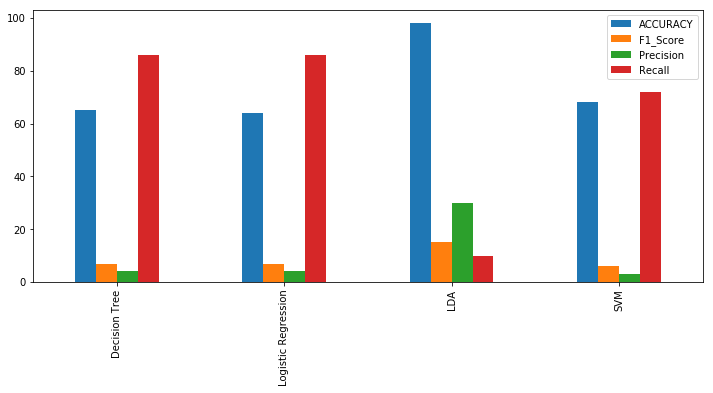

In [29]:
Scores.plot.bar(figsize=(12,5))

### Confusion matrices for all models

In [30]:
y_test.value_counts()

0    1867
1      29
Name: class, dtype: int64

In [31]:
print('Logit')
cm=confusion_matrix(y_test,Logit.predict(X_test))
cm=pd.DataFrame(cm,columns=["Predicted_0", "Predicted_1"], index=["Real_0", "Real_1"]).T
print(cm)

Logit
             Real_0  Real_1
Predicted_0    1183       4
Predicted_1     684      25


In [32]:
print('Decision Tree')
cm=confusion_matrix(y_test,Tree.predict(X_test))
cm=pd.DataFrame(cm,columns=["Predicted_0", "Predicted_1"], index=["Real_0", "Real_1"]).T
print(cm)

Decision Tree
             Real_0  Real_1
Predicted_0    1210       4
Predicted_1     657      25


In [33]:
print('SVC')
cm=confusion_matrix(y_test,SVC.predict(X_test))
cm=pd.DataFrame(cm,columns=["Predicted_0", "Predicted_1"], index=["Real_0", "Real_1"]).T
print(cm)

SVC
             Real_0  Real_1
Predicted_0    1262       8
Predicted_1     605      21


In [34]:
print('LDA')
cm=confusion_matrix(y_test,LDA.predict(X_test))
cm=pd.DataFrame(cm,columns=["Predicted_0", "Predicted_1"], index=["Real_0", "Real_1"]).T
print(cm)

LDA
             Real_0  Real_1
Predicted_0    1860      26
Predicted_1       7       3


# Logit from statsmodel with summary

In [35]:
#constructing the logit model
from statsmodels.discrete.discrete_model import Logit
model=Logit(Y,X)
#fitting the model
results=model.fit()

Optimization terminated successfully.
         Current function value: 0.076019
         Iterations 12


In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                 6318
Model:                          Logit   Df Residuals:                     6296
Method:                           MLE   Df Model:                           21
Date:                Mon, 13 May 2019   Pseudo R-squ.:                  0.1011
Time:                        00:41:11   Log-Likelihood:                -480.29
converged:                       True   LL-Null:                       -534.33
                                        LLR p-value:                 1.046e-13
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
ROA                                     -2.0804      0.777     -2.676      0.007      -3.604      -0.557
Debt ratio                               1.4218      0.409      3.473      0.001       0.619       2.224
working capital/TA                       0.0651      0.440      0.148      0.882      -0.797       0.927
Current ratio                            0.0137      0.021      0.640      0.522      -0.028       0.056
Bankruptcy ratio                     -2.387e-05   1.25e-05     -1.916      0.055   -4.83e-05    5.53e-07
retained earnings/total assets          -0.0533      0.132     -0.404      0.686      -0.312       0.205
 Sales/TA                                0.7681      0.198      3.881      0.000       0.380       1.156
Gross profit/st liabilities             -0.0085      0.077     -0.111      0.912      -0.158       0.142
(gross profit + DA)/sales               -0.0410      0.028     -1.454      0.146      -0.096       0.014
(TA* 365) / (GP+ DA)                  1.712e-06   2.26e-06      0.757      0.449   -2.72e-06    6.15e-06
POA/ FE                              -9.755e-06   3.74e-05     -0.261      0.794   -8.31e-05    6.35e-05
working capital/fixed assets             0.0033      0.006      0.591      0.555      -0.008       0.014
logarithm of TA                         -1.0323      0.078    -13.209      0.000      -1.185      -0.879
(current L * 365) / CPS                 -0.0025      0.001     -2.839      0.005      -0.004      -0.001
 total sales / TA                       -0.8521      0.223     -3.819      0.000      -1.289      -0.415
TL / ((POA +DA) * (12/365))             -0.0365      0.022     -1.658      0.097      -0.080       0.007
 net profit / inventory                  0.0005      0.000      1.713      0.087   -7.51e-05       0.001
working capital                      -3.814e-06   3.14e-06     -1.216      0.224   -9.96e-06    2.33e-06
(CA-I-st liabilities)/(sales-GP-DA)     -0.0706      0.096     -0.739      0.460      -0.258       0.117
 lt liabilities/equity                  -0.0017      0.018     -0.093      0.926      -0.037       0.033
 sales/receivables                       0.0007      0.005      0.149      0.882      -0.009       0.011
sales/fixed assets                      -0.0009      0.002     -0.578      0.563      -0.004       0.002
========================================================================================================
"""

In [37]:
#odds ratio for statistically significant variables at 5% sig level
np.exp(results.params[results.pvalues<0.05]).round(2)

ROA                        0.12
Debt ratio                 4.14
 Sales/TA                  2.16
logarithm of TA            0.36
(current L * 365) / CPS    1.00
 total sales / TA          0.43
dtype: float64

<b>ROA: 1 unit increase in ROA decreases (<1) the odds of company being in financial distress on average by 88%.

Debt Ratio: 1 unit increase in Debt Ratio increases the odds of company being in financial distress on average by 4.14 times.</b>

## Feature Importances from Decision Tree

In [38]:
#let's get feature importances
feat_imp=pd.DataFrame(Tree.feature_importances_,index=X.columns,
                      columns=["Feature_imp"])
feat_imp=feat_imp.sort_values(by="Feature_imp",ascending=False)
feat_imp

,Feature_imp
retained earnings/total assets,0.602067
(gross profit + DA)/sales,0.236614
Debt ratio,0.161319
ROA,0.000000
(current L * 365) / CPS,0.000000
sales/receivables,0.000000
lt liabilities/equity,0.000000
(CA-I-st liabilities)/(sales-GP-DA),0.000000
working capital,0.000000
net profit / inventory,0.000000


<b>retained earnings/total assets has the highest importance, i.e. about 60% of total Gini reduction happened as a result of splits based on retained earnings/total assets.</b>

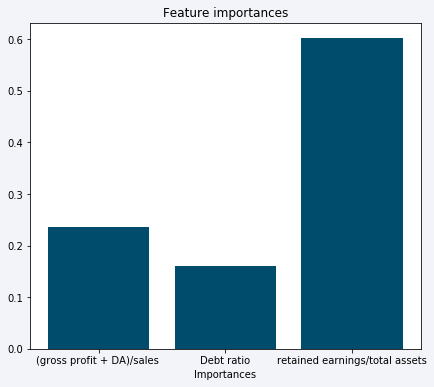

In [39]:
plt.figure(figsize=(7,6),facecolor="#f2f4f9")
plt.bar(feat_imp.index[0:3],feat_imp.Feature_imp[0:3],color="#004c6d")
plt.title("Feature importances")
plt.xlabel("Importances")
plt.show()

In [40]:
#let's visually see the tree
tree_gr=export_graphviz(Tree,out_file="tree1.txt",class_names=True, feature_names=X.columns, filled=True) 
#Go to http://webgraphviz.com/, enter the code from the text file saved